# Alucar - Analisando as vendas

In [244]:
import pandas as pd
pd.read_csv('csv/alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [245]:
alucar = pd.read_csv('csv/alucar.csv')
print('Quantidade de linhas e colunas:', alucar.shape)


Quantidade de linhas e colunas: (24, 2)


In [246]:
print('Quantidades de dados nulos:', alucar.isna().sum().sum())

Quantidades de dados nulos: 0


In [247]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [248]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [249]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

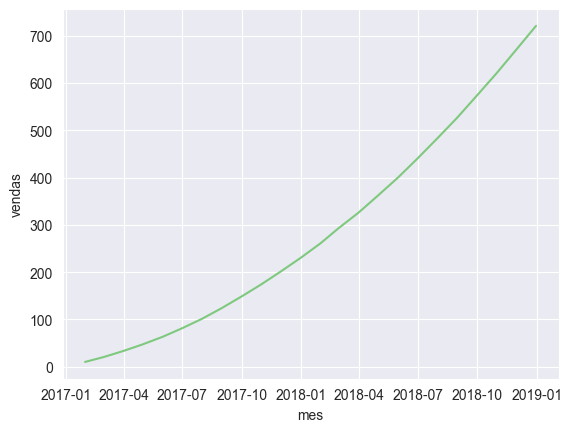

In [250]:
sns.lineplot(x='mes', y='vendas', data=alucar)
sns.set_palette('Accent')
sns.set_style('darkgrid')

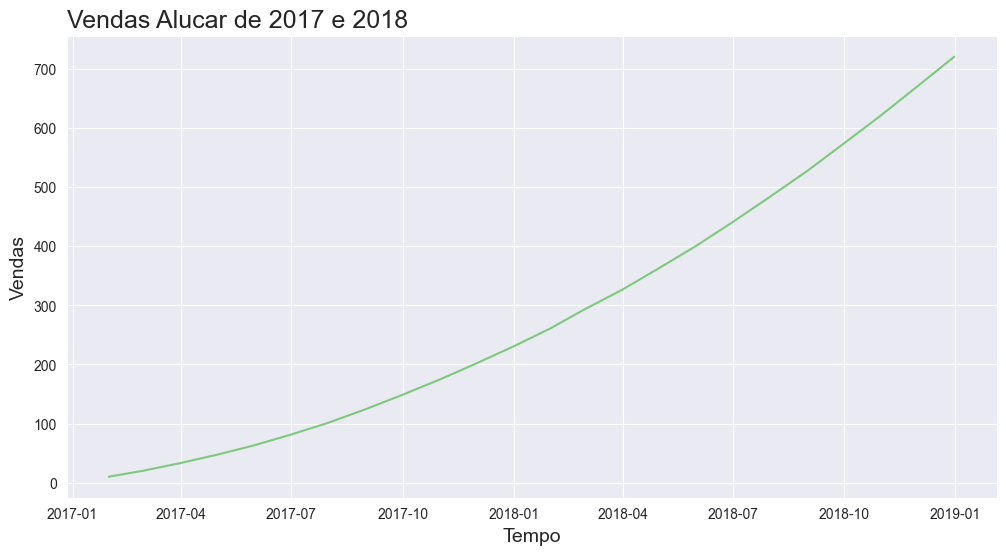

In [251]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize='18')
ax.set_xlabel('Tempo', fontsize='14')
ax.set_ylabel('Vendas', fontsize='14')
ax = ax

In [252]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


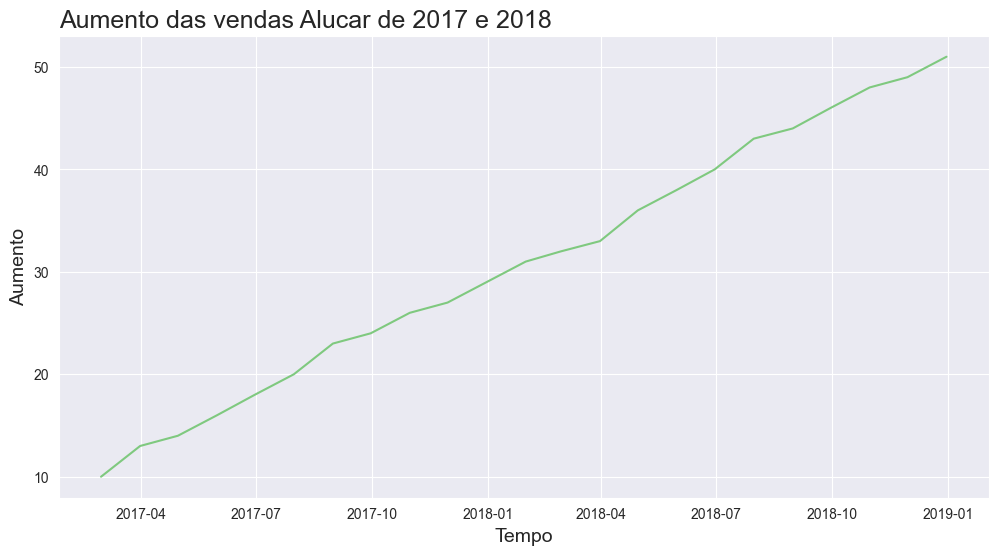

In [253]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas Alucar de 2017 e 2018', loc='left', fontsize='18')
ax.set_xlabel('Tempo', fontsize='14')
ax.set_ylabel('Aumento', fontsize='14')
ax = ax

In [254]:
def plotar (titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize='18')
    ax.set_xlabel(labelx, fontsize='14')
    ax.set_ylabel(labely, fontsize='14')
    ax = ax

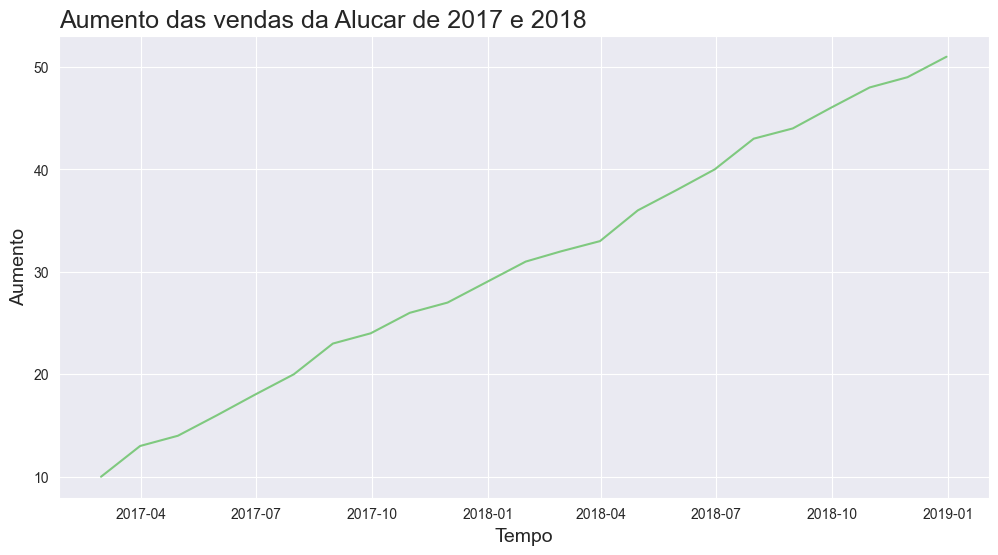

In [255]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [256]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


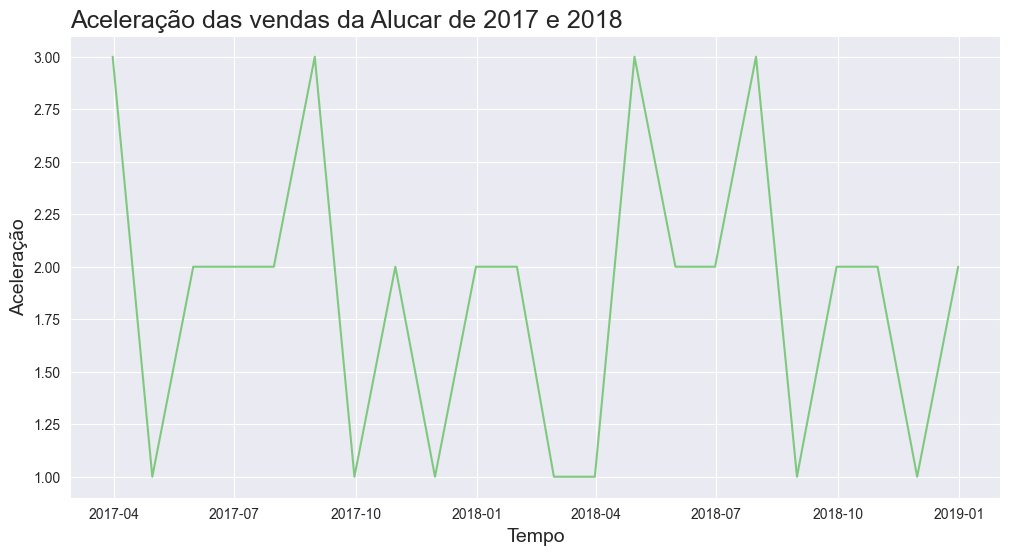

In [257]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

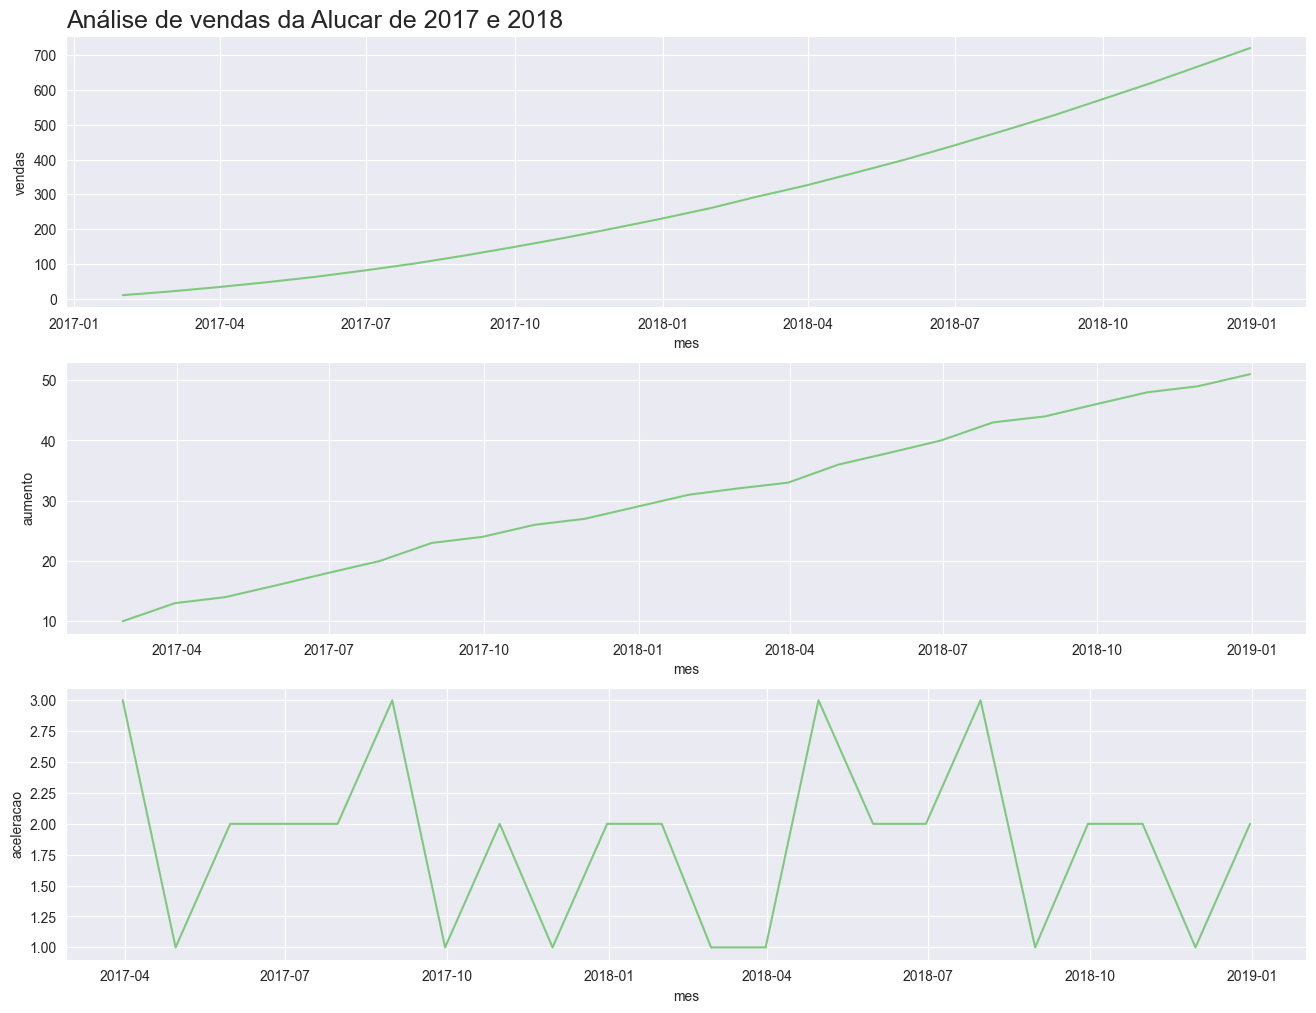

In [258]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize = 18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [259]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize = 18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

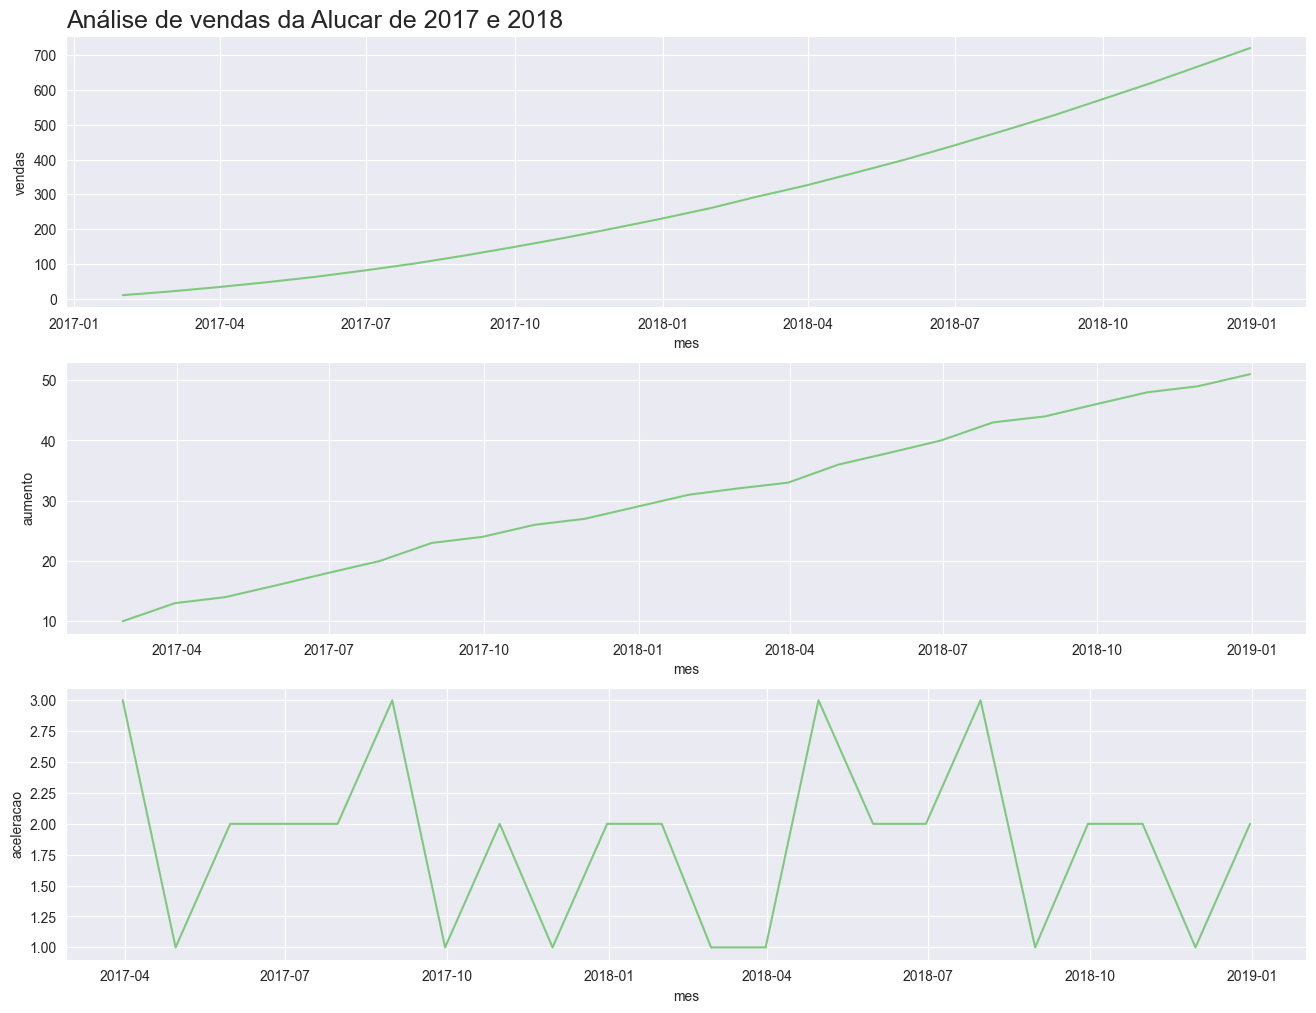

In [260]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise das vendas da Alucar de 2017 e 2018')

In [261]:
from pandas.plotting import autocorrelation_plot

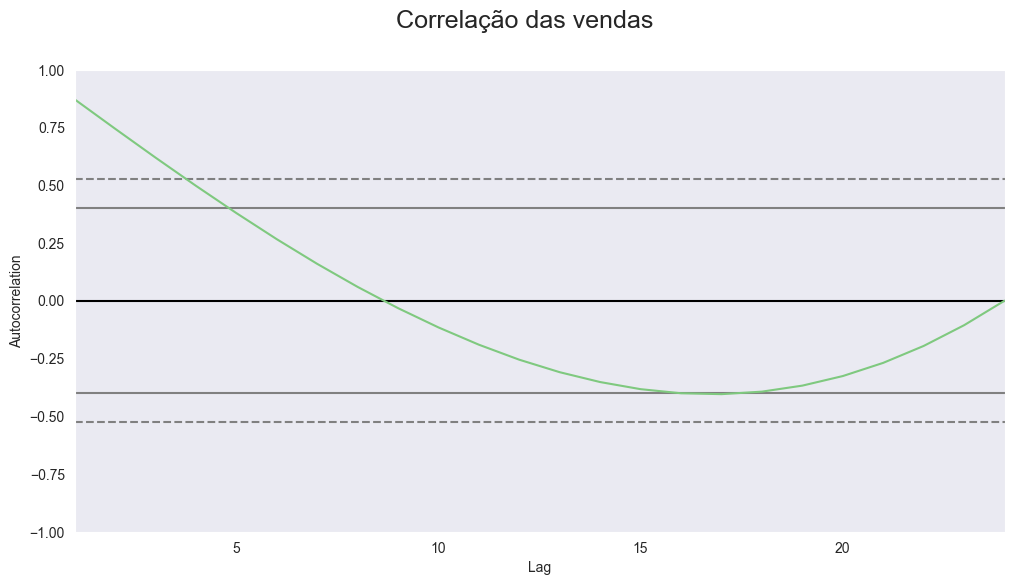

In [262]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize = 18)
autocorrelation_plot(alucar['vendas'])
ax = ax

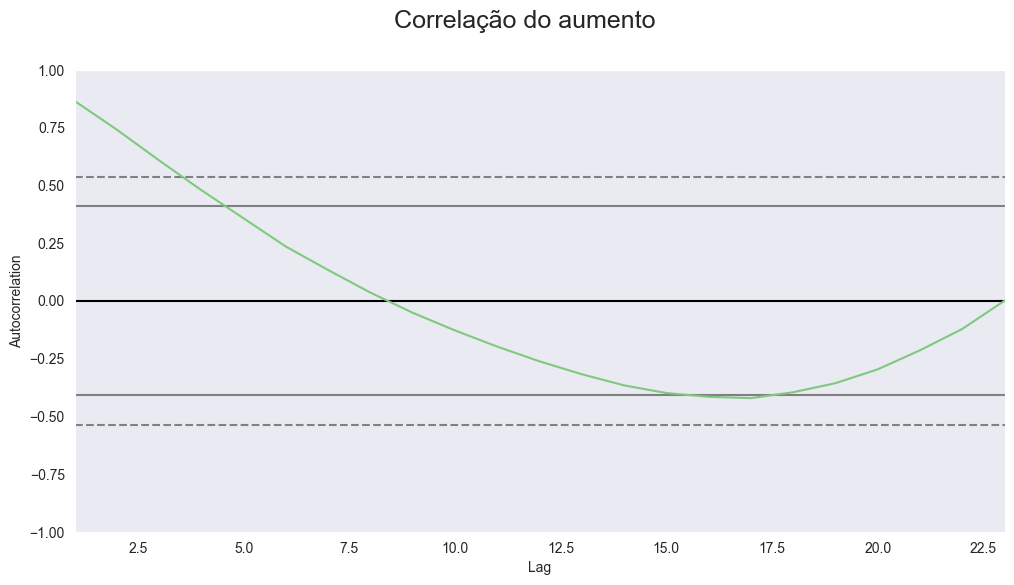

In [263]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize = 18)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

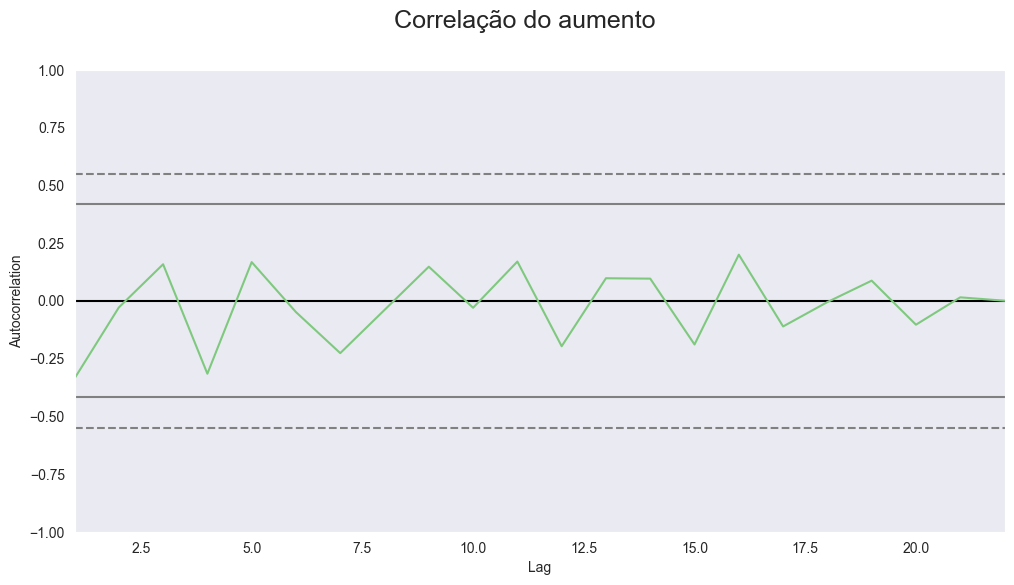

In [264]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize = 18)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da newsletter


In [265]:
assinantes = pd.read_csv('csv/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [266]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [267]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [268]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


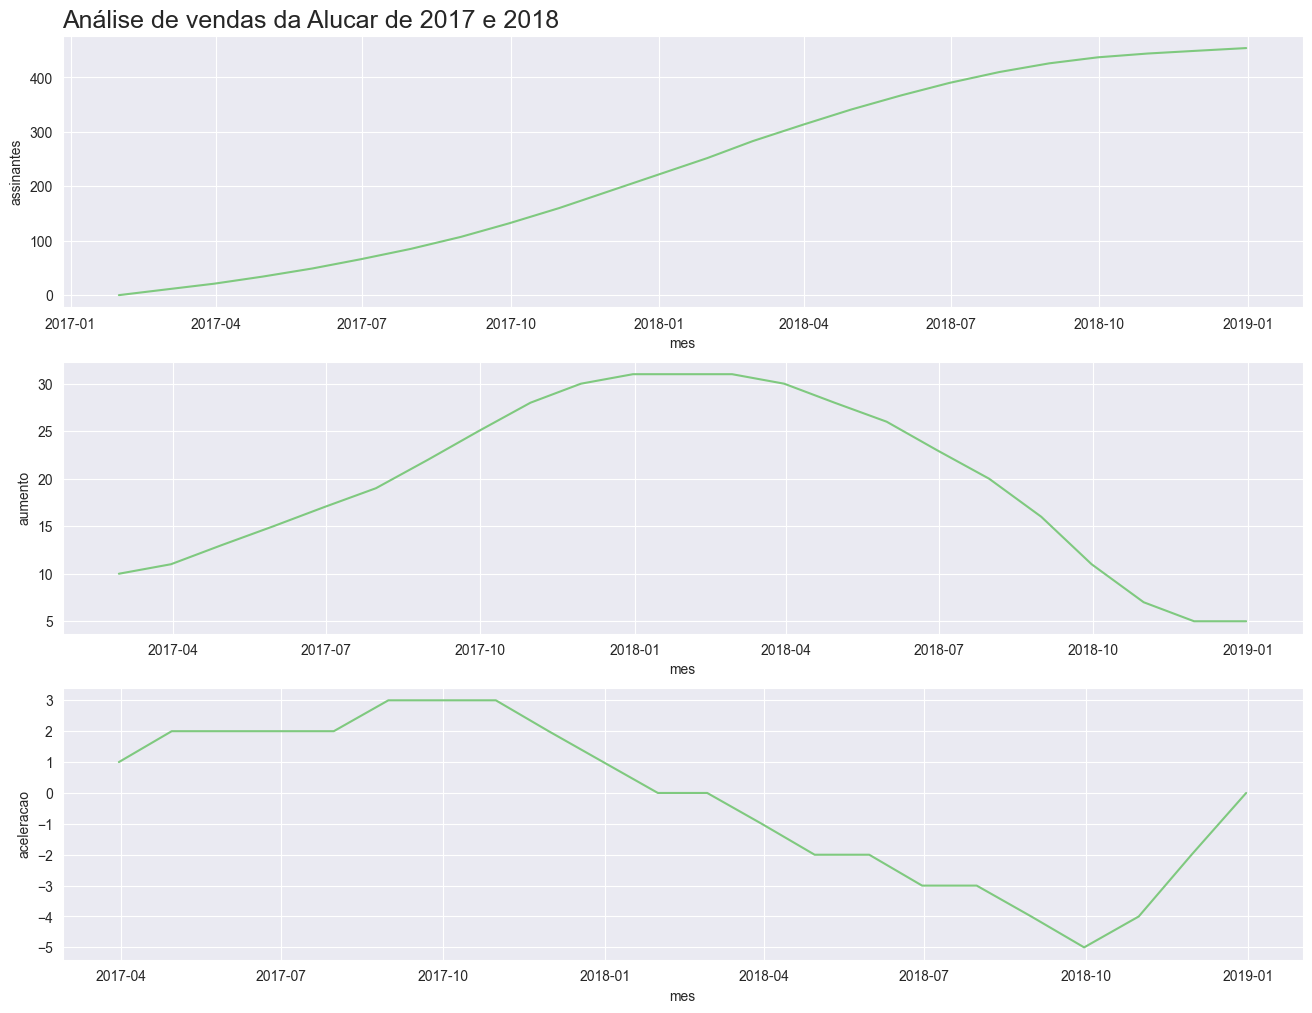

In [269]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

# Chocolura - Analisando as vendas

In [270]:
chocolura = pd.read_csv('csv/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [271]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])


In [272]:
print('Quantidade de linhas:', chocolura.shape)
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos: 0


In [273]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [274]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


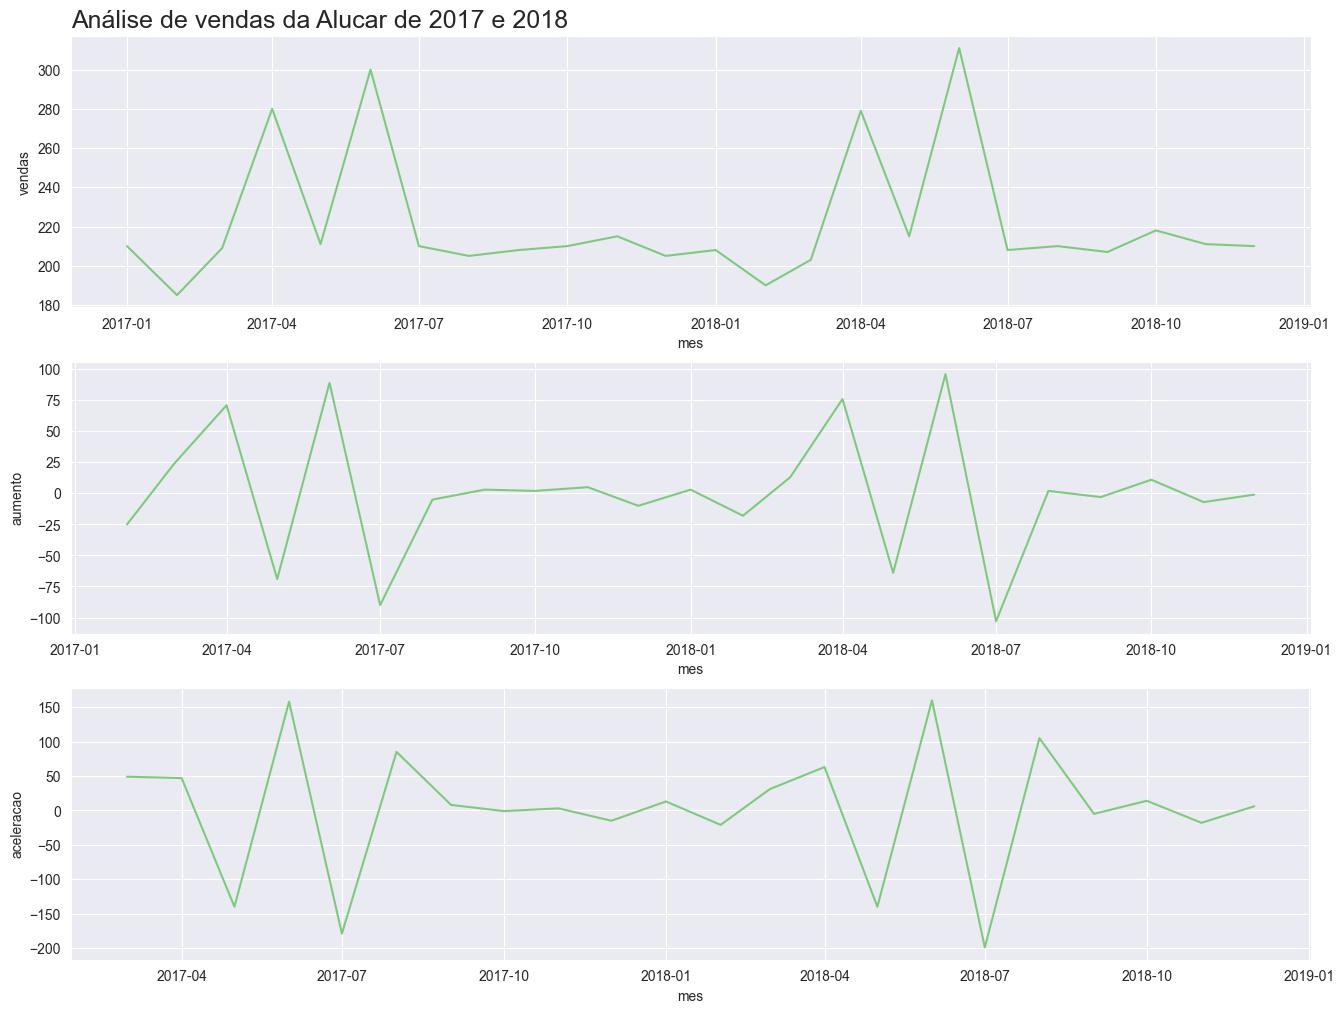

In [275]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da chocolura de 2017 a 2018')

# Chocholura - Vendas diárias (outubro e novembro)

In [276]:
vendas_por_dia = pd.read_csv('csv/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [277]:
print('Quantidade de linhas e colunas:', vendas_por_dia.shape)
print('Quantidade de dados nulos', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos 0


In [278]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


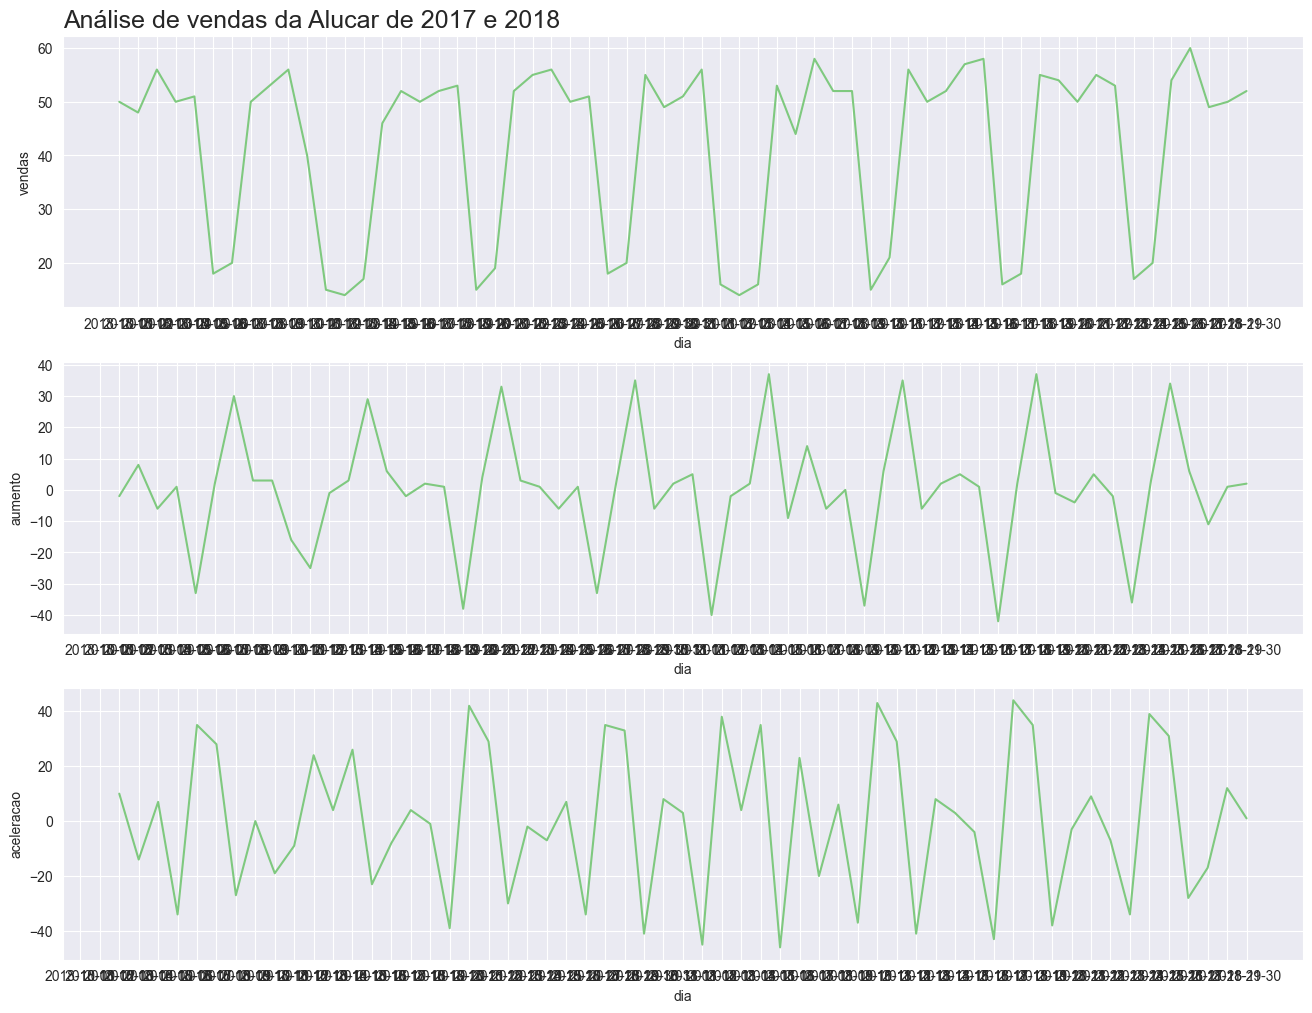

In [279]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas de outubro e novembro chocolura')

# Analisando a Sazonalidade

In [280]:
print(vendas_por_dia['dia'].dtype)


object


In [281]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'], errors='coerce')


In [282]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia ['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [283]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.strftime('%A')
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [284]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [285]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday': 'Terça', 'Wednesday': 'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado',
       'Sunday':'Domingo'}

In [286]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


# Agrupando os dias

In [288]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()

In [289]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0
